In [3]:
import pandas as pd
import numpy as np
import random as rnd

from matplotlib import pyplot as plt
import warnings
import seaborn as sns


import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/test.csv
./input/gender_submission.csv
./input/train.csv


In [4]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
data = pd.concat([train.drop('Survived', axis=1), test])

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


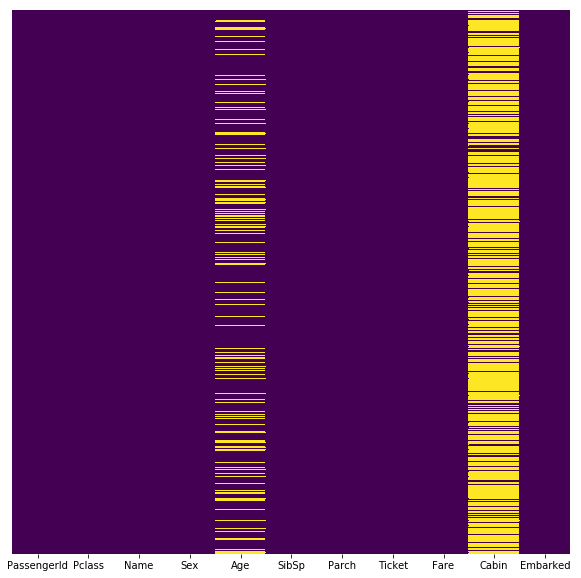

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [13]:
train['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [14]:
train['Name'].value_counts()

McMahon, Mr. Martin                                         1
Harris, Mr. George                                          1
Hampe, Mr. Leon                                             1
Novel, Mr. Mansouer                                         1
Daly, Mr. Peter Denis                                       1
Lindblom, Miss. Augusta Charlotta                           1
Badt, Mr. Mohamed                                           1
Johannesen-Bratthammer, Mr. Bernt                           1
Peter, Mrs. Catherine (Catherine Rizk)                      1
LeRoy, Miss. Bertha                                         1
Johnson, Mr. Alfred                                         1
Simonius-Blumer, Col. Oberst Alfons                         1
Rice, Mrs. William (Margaret Norton)                        1
Doling, Miss. Elsie                                         1
Rogers, Mr. William John                                    1
Giles, Mr. Frederick Edward                                 1
Niskanen

In [15]:
train['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
347088              6
CA 2144             6
3101295             6
382652              5
S.O.C. 14879        5
17421               4
113760              4
349909              4
PC 17757            4
113781              4
W./C. 6608          4
19950               4
2666                4
LINE                4
347077              4
4133                4
248727              3
345773              3
230080              3
F.C.C. 13529        3
13502               3
347742              3
SC/Paris 2123       3
PC 17755            3
29106               3
PC 17760            3
110413              3
                   ..
W.E.P. 5734         1
229236              1
F.C.C. 13528        1
349216              1
330959              1
PC 17759            1
SC 1748             1
SOTON/O2 3101272    1
113055              1
244310              1
36967               1
2623                1
PC 17599            1
PC 17600            1
2649      

In [16]:
train['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
F2                 3
F33                3
C22 C26            3
E101               3
C65                2
D35                2
B35                2
B58 B60            2
B22                2
B20                2
B5                 2
C93                2
E121               2
E44                2
B51 B53 B55        2
F4                 2
E8                 2
C125               2
C2                 2
C92                2
C123               2
B57 B59 B63 B66    2
D33                2
B18                2
C52                2
D26                2
                  ..
C85                1
D56                1
E31                1
D49                1
B50                1
B80                1
D9                 1
F E69              1
B82 B84            1
F38                1
E77                1
C111               1
T                  1
C128               1
A5                 1
D37                1
E68          

In [17]:
train.drop(['Cabin', 'Name', 'Ticket'], axis=1)
test.drop(['Cabin', 'Name', 'Ticket'], axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [18]:
def set_figSize():
    plt.figure(figsize=[12,8])

In [19]:
def legend_survived():
    plt.legend(['Did Not Survive', 'Survived'], loc='best')

In [20]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

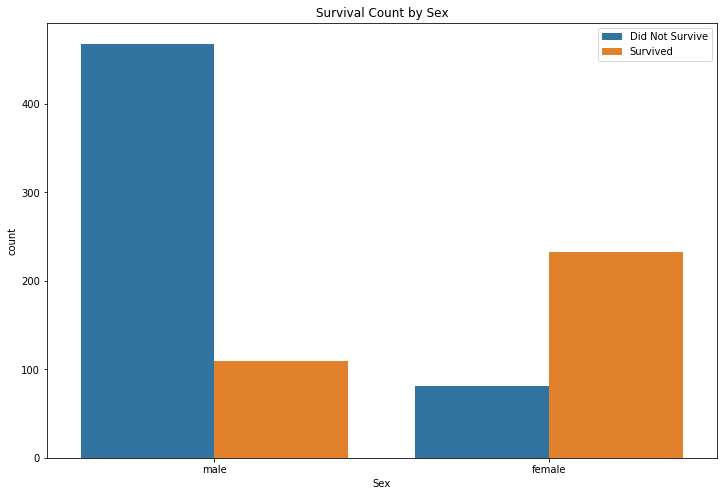

In [22]:
set_figSize()
plt.title('Survival Count by Sex')
sns.countplot('Sex', data=train, hue='Survived')
legend_survived()

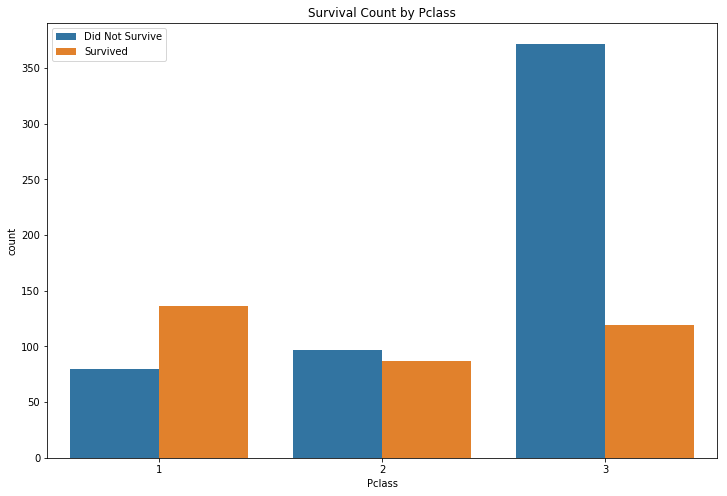

In [28]:
set_figSize()
plt.title('Survival Count by Pclass')
sns.countplot('Pclass', data=train, hue='Survived')
legend_survived()

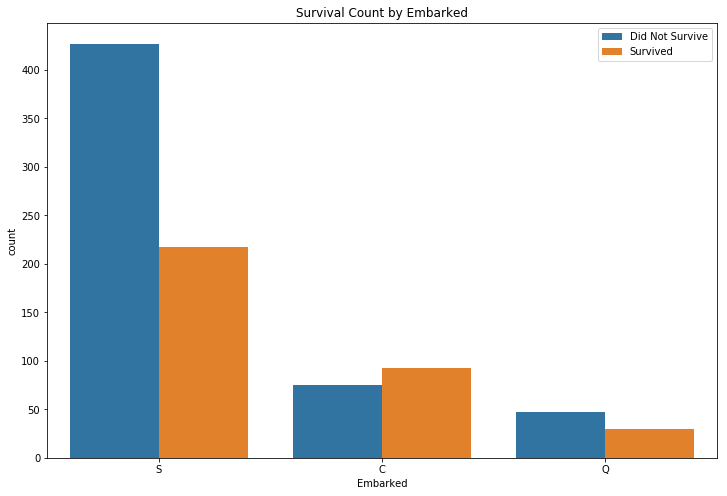

In [29]:
set_figSize()
plt.title('Survival Count by Embarked')
sns.countplot('Embarked', data=train, hue='Survived')
legend_survived()

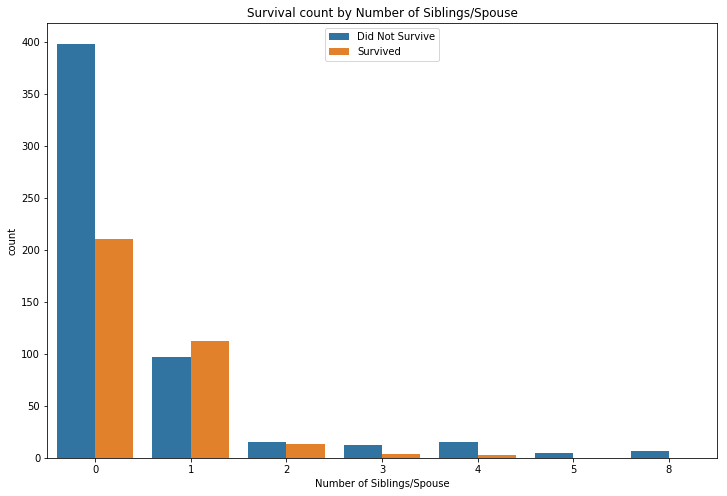

In [31]:
set_figSize()
plt.title('Survival count by Number of Siblings/Spouse')
sns.countplot('SibSp',data=train,hue='Survived')
plt.xlabel('Number of Siblings/Spouse')
legend_survived()

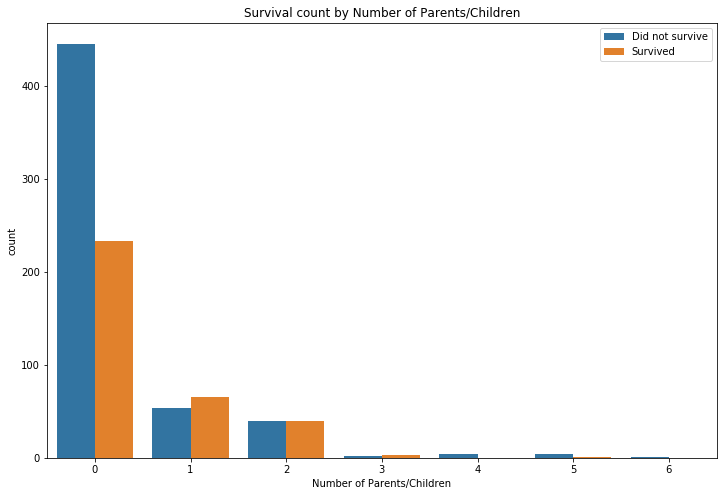

In [33]:
set_figSize()
plt.title('Survival count by Number of Parents/Children')
sns.countplot('Parch',data=train,hue='Survived')
plt.xlabel('Number of Parents/Children')
plt.legend(['Did not survive','Survived'],loc='upper right')

Text(0, 0.5, 'Density')

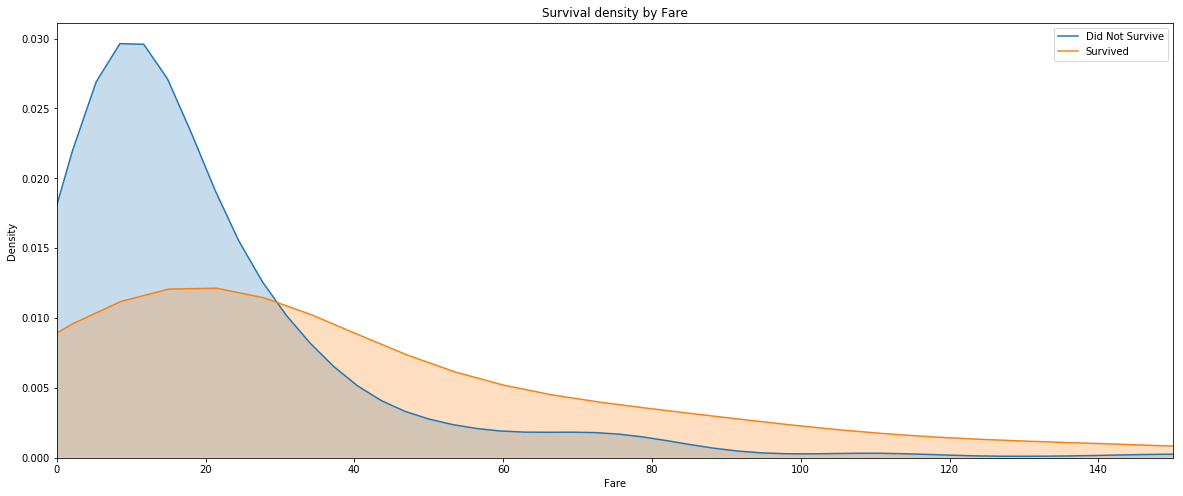

In [34]:
plt.figure(figsize=(20,8))

ax1 = sns.kdeplot(not_survived['Fare'],shade=True)
ax1.set_xlim((0,150))

ax2 = sns.kdeplot(survived['Fare'],shade=True)
ax2.set_xlim((0,150))

legend_survived()
plt.title('Survival density by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')

In [41]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True)

d = {1:'1st', 2:'2nd', 3:'3d'}

train['Pclass'] = train['Pclass'].map(d)

#Getting Dummies of Categorical Variables

cat_vars = train[['Pclass', 'Sex', 'Embarked']]
dummies = pd.get_dummies(cat_vars, drop_first=True)

#Drop original cat_vars
train = train.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
# Concatenate dummies and train
train = pd.concat([train,dummies],axis=1)

# Check the clean version of the train data.
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2nd,Pclass_3d,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Pclass_2nd     891 non-null uint8
Pclass_3d      891 non-null uint8
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 67.1+ KB


In [43]:
train = train.drop(['Ticket','Name','Cabin'],axis=1)
test = test.drop(['Ticket','Name','Cabin'],axis=1)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Pclass_2nd     891 non-null uint8
Pclass_3d      891 non-null uint8
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [45]:
# split features and label
X = train.drop(['Survived'],1)
y = train['Survived']

# Use train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[146  15]
 [ 38  69]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       161
           1       0.82      0.64      0.72       107

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [51]:
# Imputing Missing Age Values: choose median due to outliers, which affect mean
test['Age'].fillna(test['Age'].median(),inplace=True)

# Imputing Missing Embarked Values
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Impute Embarked
test['Embarked'].fillna(test['Embarked'].value_counts().index[0], inplace=True)

In [53]:
#Creating a dictionary to convert Passenger Class from 1,2,3 to 1st,2nd,3rd.
d = {1:'1st',2:'2nd',3:'3rd'}

#Mapping the column based on the dictionary
test['Pclass'] = test['Pclass'].map(d)

# Getting Dummies of Categorical Variables
cat_vars = test[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(cat_vars,drop_first=True)

# Drop original cat_vars
test = test.drop(cat_vars,axis=1)
# Concatenate dummies and train
test = pd.concat([test,dummies],axis=1)

idx = test[['PassengerId']]


In [54]:
preds = model.predict(test)
results = idx.assign(Survived=preds)
results.to_csv('GBC_submission.csv',index=False)